# Simple Bayes Generative Model

Fit data to a gaussian model then sample from it.

* $P(Y|X)$ is the probability of being class Y given image X
* $P(X|Y)$ is the generative model which generate image X given Y.
  $$P(X|Y) = \frac{P(Y|X)\ P(X)}{P(Y)}$$

Given the training data, we can fit the data to a gaussian model to build $P(X|Y)$ and then sample from this gaussian model to generate some images. The following block is doing this task for MNIST dataset

Reading in and transforming data...


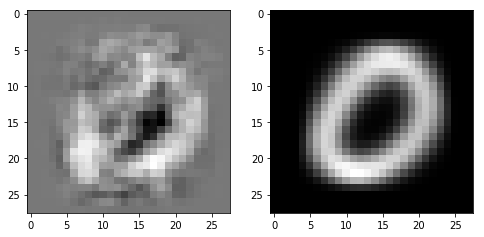

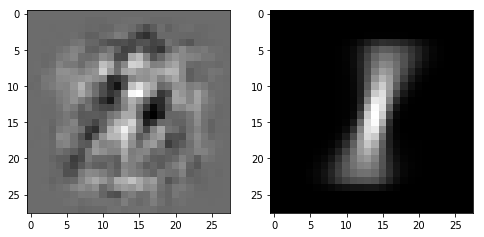

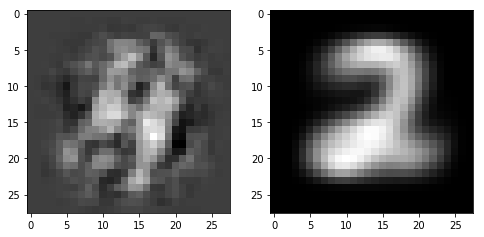

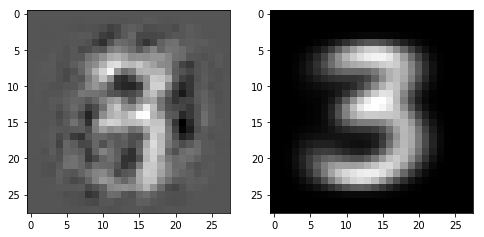

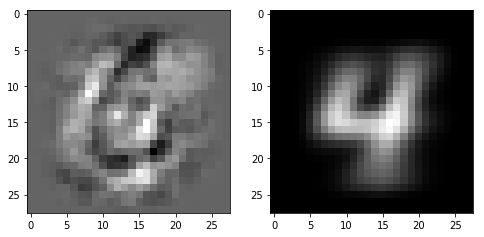

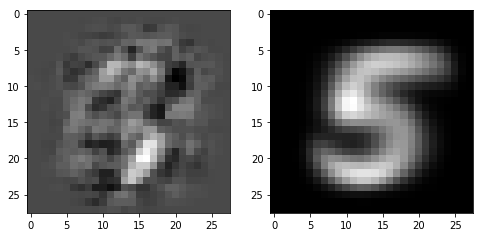

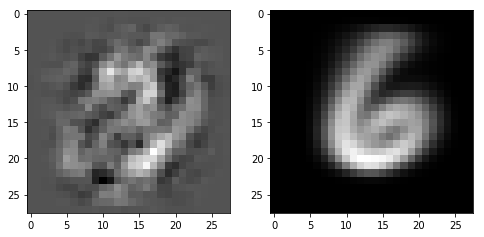

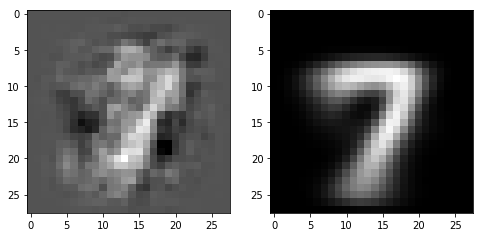

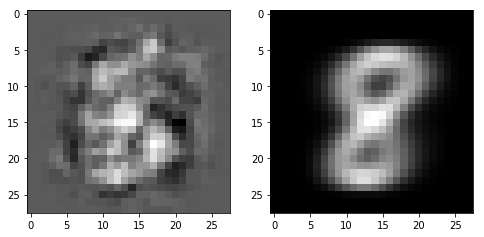

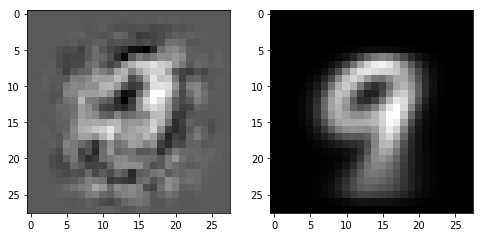

In [13]:
import util
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt


class bayes_generator:
    def fit(self,x,y):
        self.n_cats = len(set(y))
        self.distributions = []
        for cat in range(self.n_cats):
            xK = x[y == cat]
            mean = np.mean(xK,axis = 0)
            cov = np.cov(x.T) # np.cov assumes each row is one variable (here pixel)
            gaussian_dis = {"m":mean, "c": cov}
            self.distributions.append(gaussian_dis)
    
    def sample_give_y(self,cat):
        dist = self.distributions[cat]
        return mvn.rvs(mean = dist["m"],cov=dist["c"])
    

X, Y = util.get_mnist()
gen = bayes_generator()
gen.fit(X,Y)
n_samples = 10
for k in range(n_samples):
    sample_generated = gen.sample_give_y(k).reshape(28,28)
    mean = gen.distributions[k]["m"].reshape(28, 28)
    plt.figure(figsize=(8,16))
    plt.subplot(121)
    plt.imshow(sample_generated,cmap='gray')
    plt.subplot(122)
    plt.imshow(mean,cmap='gray')
    plt.show()